### Install Ultralytics package

In [ ]:
!pip install -qq ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.9/802.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 54.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [ ]:
%cd /content/drive/MyDrive/Thesis_2024/yolo

/content/drive/MyDrive/Thesis_2024/yolo


## DETECT

### Training Yolov9s detection
I train this model by using yolov9s, 50 epochs and imgsz is 640

In [ ]:
!yolo task=detect mode=train model=yolov9s.pt data= /content/drive/MyDrive/Thesis_2024/yolo/detect/data.yaml epochs=50 imgsz=640

100% 14.7M/14.7M [00:00<00:00, 132MB/s]
Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=/content/drive/MyDrive/Thesis_2024/yolo/detect/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sa

### Validate detect model on val dataset

In [ ]:
!yolo task=detect mode=val model='/content/drive/MyDrive/Thesis_2024/yolo/runs/detect/train3/weights/last.pt' data=/content/drive/MyDrive/Thesis_2024/yolo/detect/data.yaml split = val

Ultralytics YOLOv8.2.60 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9s summary (fused): 486 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs
100% 755k/755k [00:00<00:00, 24.4MB/s]
val: Scanning /content/drive/MyDrive/Thesis_2024/yolo/detect/labels/val.cache... 86 images, 10 backgrounds, 0 corrupt: 100% 96/96 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:33<00:00,  5.61s/it]
                   all         96        101      0.615      0.495      0.441      0.201
Speed: 0.2ms preprocess, 16.7ms inference, 0.0ms loss, 8.8ms postprocess per image
Results saved to runs/detect/val22
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=val model='/content/drive/MyDrive/Thesis_2024/yolo/runs/detect/train3/weights/best.pt' data=/content/drive/MyDrive/Thesis_2024/yolo/detect/data.yaml split = val

Ultralytics YOLOv8.2.60 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9s summary (fused): 486 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs
val: Scanning /content/drive/MyDrive/Thesis_2024/yolo/detect/labels/val.cache... 86 images, 10 backgrounds, 0 corrupt: 100% 96/96 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:05<00:00,  1.08it/s]
                   all         96        101       0.68      0.442      0.484      0.226
Speed: 6.1ms preprocess, 17.2ms inference, 0.0ms loss, 10.1ms postprocess per image
Results saved to runs/detect/val23
💡 Learn more at https://docs.ultralytics.com/modes/val


### Inference on test dataset

In [ ]:
!yolo task=detect mode=predict save=True model='/content/drive/MyDrive/Thesis_2024/yolo/runs/detect/train3/weights/best.pt' conf=0.25 source="/content/drive/MyDrive/Thesis_2024/yolo/detect/images/test"

Ultralytics YOLOv8.2.60 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9s summary (fused): 486 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs

image 1/58 /content/drive/MyDrive/Thesis_2024/yolo/detect/images/test/IMG0000142.jpg: 640x512 (no detections), 114.6ms
image 2/58 /content/drive/MyDrive/Thesis_2024/yolo/detect/images/test/IMG0000207.jpg: 640x512 2 fractureds, 16.9ms
image 3/58 /content/drive/MyDrive/Thesis_2024/yolo/detect/images/test/IMG0000454.jpg: 640x544 (no detections), 142.6ms
image 4/58 /content/drive/MyDrive/Thesis_2024/yolo/detect/images/test/IMG0000480.jpg: 640x544 2 fractureds, 32.2ms
image 5/58 /content/drive/MyDrive/Thesis_2024/yolo/detect/images/test/IMG0000671.jpg: 640x544 (no detections), 32.9ms
image 6/58 /content/drive/MyDrive/Thesis_2024/yolo/detect/images/test/IMG0000776.jpg: 640x544 2 fractureds, 19.7ms
image 7/58 /content/drive/MyDrive/Thesis_2024/yolo/detect/images/test/IMG0000777.jpg: 640x544 2 fractureds, 21.2ms
image 8/58 /

### Plot result on test data

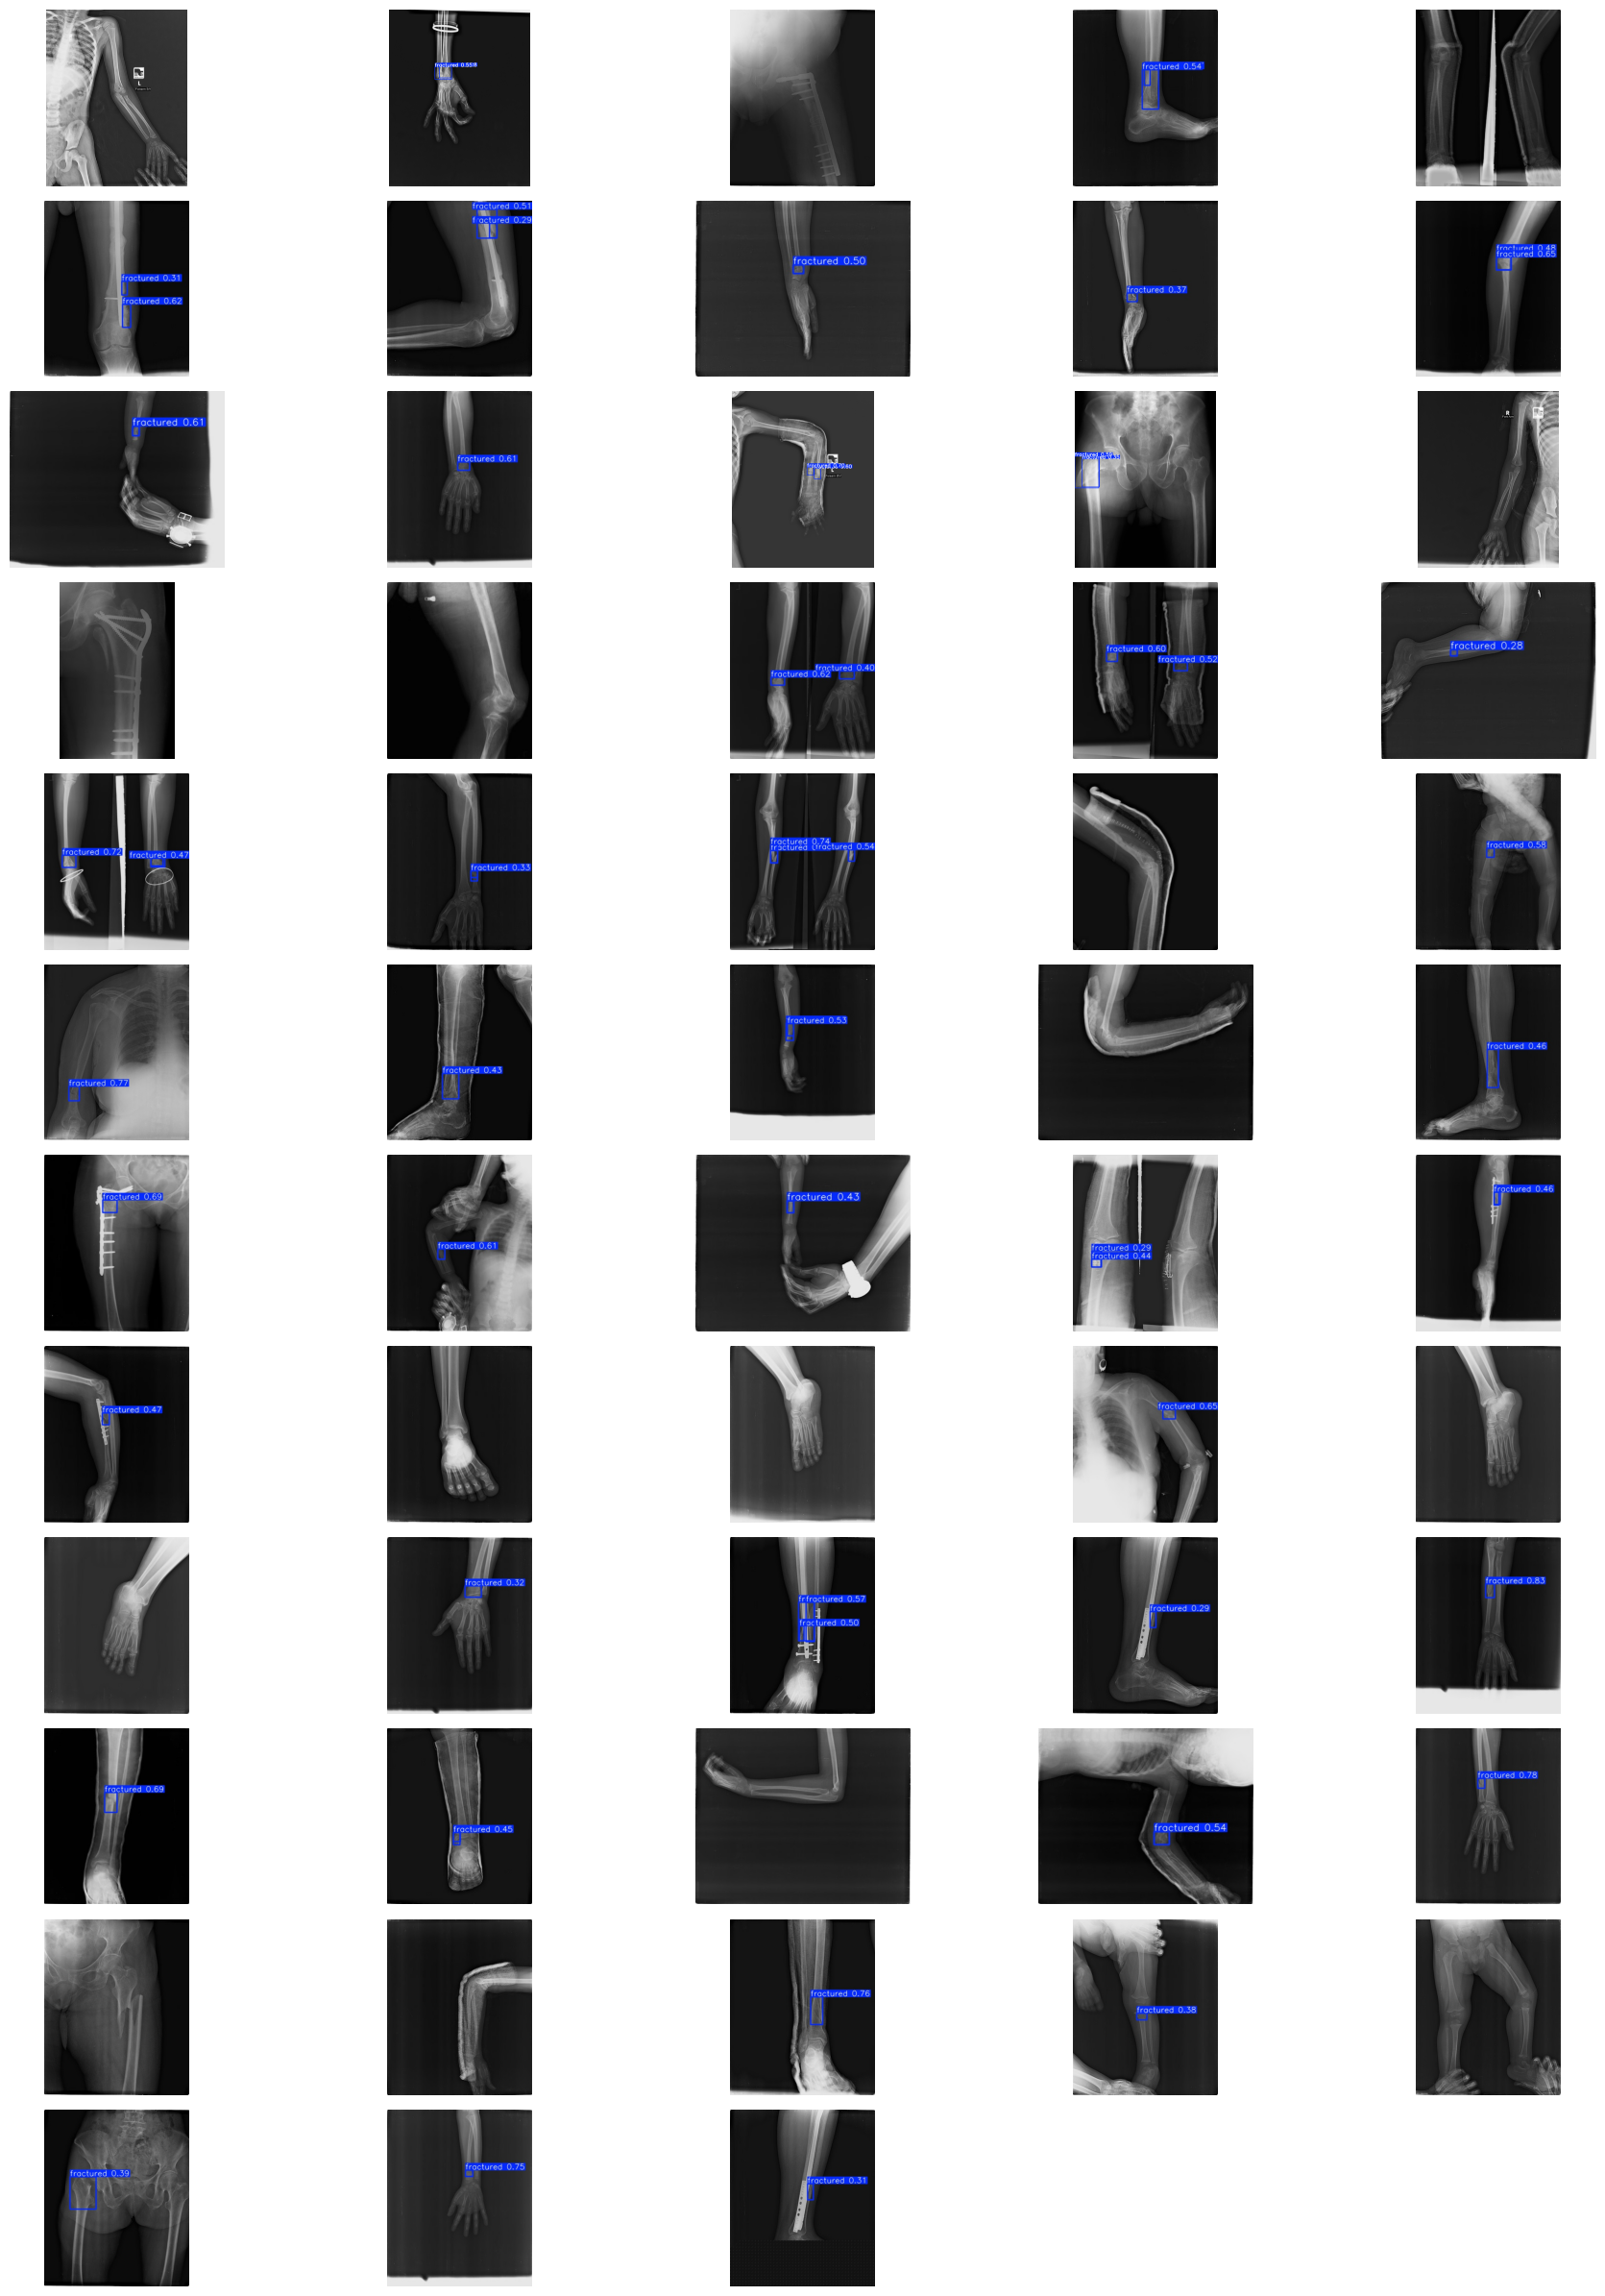

In [ ]:
import random

folder_path = '/content/drive/MyDrive/Thesis_2024/yolo/runs/detect/predict6'

images = [os.path.join(folder_path, img) for img in os.listdir(folder_path)
          if img.endswith(".jpg")]

# Calculate number of rows and columns for a 12-row grid
num_images = len(images)
num_rows = 12
num_cols = (num_images + num_rows - 1) // num_rows  # Integer division for full rows

# Create a figure with appropriate figsize for better visualization
plt.figure(figsize=(18, 24))  # Adjust width and height for desired layout

# Display images in a 12-row grid
for i, image_path in enumerate(images):
    img = mpimg.imread(image_path)

    # Calculate row and column indices for grid placement
    row = i // num_cols
    col = i % num_cols

    # Create a subplot and display the image
    plt.subplot(num_rows, num_cols, i + 1)  # Start subplot indexing from 1
    plt.imshow(img)

    plt.axis('off')

plt.tight_layout()

plt.show()


### Validate detect model on test dataset

In [ ]:
!yolo task=detect mode=val save=True model='/content/drive/MyDrive/Thesis_2024/yolo/runs/detect/train3/weights/last.pt' data=/content/drive/MyDrive/Thesis_2024/yolo/detect/data.yaml split = test

Ultralytics YOLOv8.2.60 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9s summary (fused): 486 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs
val: Scanning /content/drive/MyDrive/Thesis_2024/yolo/detect/labels/test.cache... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.22it/s]
                   all         58         73      0.572      0.549      0.556      0.228
Speed: 5.5ms preprocess, 25.5ms inference, 0.1ms loss, 14.6ms postprocess per image
Results saved to runs/detect/val24
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=val save=True model='/content/drive/MyDrive/Thesis_2024/yolo/runs/detect/train3/weights/best.pt' data=/content/drive/MyDrive/Thesis_2024/yolo/detect/data.yaml split = test

Ultralytics YOLOv8.2.60 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9s summary (fused): 486 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs
val: Scanning /content/drive/MyDrive/Thesis_2024/yolo/detect/labels/test.cache... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.12it/s]
                   all         58         73      0.666      0.479      0.528      0.212
Speed: 3.3ms preprocess, 35.5ms inference, 0.0ms loss, 11.0ms postprocess per image
Results saved to runs/detect/val25
💡 Learn more at https://docs.ultralytics.com/modes/val
